# NLP Lab - Customer Sentiment on reviews of purchased womens clothing

## importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
clothingdf.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
clothingdf.drop(['Unnamed: 0', 'Clothing ID','Age', 'Recommended IND', 'Positive Feedback Count','Class Name'], axis = 1, inplace = True) 

In [7]:
clothingdf.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## filtering

In [8]:
filtered_clothingdf=clothingdf.copy()

In [9]:
filtered_clothingdf.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [10]:
#standarise column headers
filtered_clothingdf.columns= filtered_clothingdf.columns.str.lower()

In [11]:
filtered_clothingdf.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## EDA

In [12]:
filtered_clothingdf.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- mean review rating  4.19 
- max review rating 5.00
- min review rating 1.00

In [13]:
filtered_clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


the new filetred df contains some nulls we will get rid of

## average rating by division and department as a new dataframe

In [14]:
df_avg_div_dep=filtered_clothingdf.groupby(['division name','department name'],as_index=False).agg({'rating':'mean'})

In [15]:
df_avg_div_dep.sort_values(by='rating',ascending=True)

,division name,department name,rating
10,General Petite,Trend,3.782609
4,General,Trend,3.822917
6,General Petite,Dresses,4.133256
3,General,Tops,4.148749
1,General,Dresses,4.163003
9,General Petite,Tops,4.216469
2,General,Jackets,4.240310
7,General Petite,Intimate,4.240343
0,General,Bottoms,4.268686
11,Initmates,Intimate,4.286285


## visualization

<AxesSubplot:ylabel='division name,department name'>

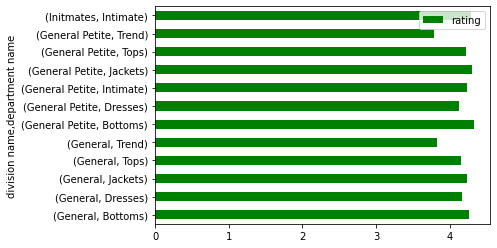

In [16]:
df_avg_div_dep.set_index(['division name', 'department name']).plot.barh(color='green')

## apply textblob in 3 samples

In [17]:
filtered_clothingdf.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


### 1st sample

In [18]:
filtered_clothingdf.iloc[5,1]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [19]:
testimonial1=TextBlob("I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.").sentiment

In [20]:
testimonial1

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

### 2nd sample

In [21]:
filtered_clothingdf.iloc[3,1]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [22]:
testimonial2=TextBlob("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!").sentiment

In [23]:
testimonial2

Sentiment(polarity=0.5499999999999999, subjectivity=0.625)

### 3rd sample

In [24]:
filtered_clothingdf.iloc[97,1]

"I was very excited to order this top in red xs. so cute, but it was huge, shapeless and support thin! it had to go back. i should've looked at other reviews."

In [25]:
testimonial3=TextBlob("The fabric felt cheap and i didn't find it to be a flattering top. for reference i am wearing a medium in the photos and my measurements are 38-30-40.").sentiment

In [26]:
testimonial3

Sentiment(polarity=0.45, subjectivity=0.6)

## breaking out the text into sentences

In [27]:
corpus = "I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."

blob_object = TextBlob(corpus)

# Sentence tokenization of the sample corpus
corpus_sentence = blob_object.sentences
# To identify all tokens
print(corpus_sentence)
# To count the number of tokens
print(len(corpus_sentence))

[Sentence("I love tracy reese dresses, but this one is not for the very petite."), Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."), Sentence("this dress was very pretty out of the package but its a lot of dress."), Sentence("the skirt is long and very full so it overwhelmed my small frame."), Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."), Sentence("i love the color and the idea of the style but it just did not work on me."), Sentence("i returned this dress.")]
7


## remove any rows in your data which contain have null in the review column

In [28]:
filtered_clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


## using dropna, remove any rows in your data which contain have null in the review column 

In [29]:
## Drop nulls
filtered_clothingdf.dropna(subset=['review text'], inplace=True)

In [30]:
# reset index
filtered_clothingdf.reset_index(drop=True, inplace=True)

In [31]:
filtered_clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division name    22628 non-null  object
 4   department name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 884.5+ KB


## define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. 

In [37]:
#apply + lambda

filtered_clothingdf['sentiment']= filtered_clothingdf['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)



In [39]:
filtered_clothingdf['sentiment']

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
22636    0.552667
22637    0.091667
22638    0.414286
22639    0.322222
22640    0.413889
Name: sentiment, Length: 22641, dtype: float64

In [40]:
filtered_clothingdf['sentiment'] = filtered_clothingdf['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [41]:
filtered_clothingdf

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
...,...,...,...,...,...,...
22636,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667
22637,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667
22638,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286
22639,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222


## using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [49]:
df_min_div_dep=filtered_clothingdf.groupby(['division name','department name'],as_index=False).agg({'sentiment':'min'})


In [50]:
df_min_div_dep

,division name,department name,sentiment
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


## visualise this summary as a simple sorted bar chart 

In [52]:
#sorting values by sentiment
df_min_div_dep.sort_values(by='sentiment',ascending=True)

,division name,department name,sentiment
3,General,Tops,-0.975000
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
9,General Petite,Tops,-0.700000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
0,General,Bottoms,-0.533333
6,General Petite,Dresses,-0.400000
11,Initmates,Intimate,-0.392333
4,General,Trend,-0.270833


<AxesSubplot:ylabel='division name,department name'>

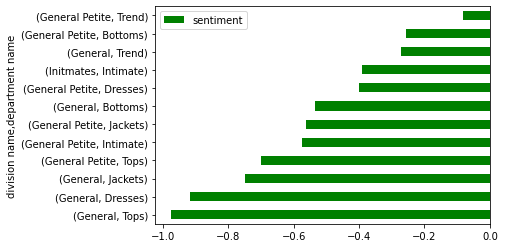

In [54]:
df_min_div_dep.sort_values(by='sentiment',ascending=True).set_index(['division name', 'department name']).plot.barh(color='green')


## using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

In [59]:
df_avg_rev_pol=filtered_clothingdf.groupby(['division name','department name'],as_index=False).agg({'sentiment':'mean'})


In [56]:
df_avg_rev_pol

,division name,department name,sentiment
0,General,Bottoms,0.245849
1,General,Dresses,0.251091
2,General,Jackets,0.237141
3,General,Tops,0.247025
4,General,Trend,0.203986
5,General Petite,Bottoms,0.259258
6,General Petite,Dresses,0.248380
7,General Petite,Intimate,0.239517
8,General Petite,Jackets,0.241773
9,General Petite,Tops,0.256835


## visualise this summary as a simple sorted bar chart

<AxesSubplot:ylabel='division name,department name'>

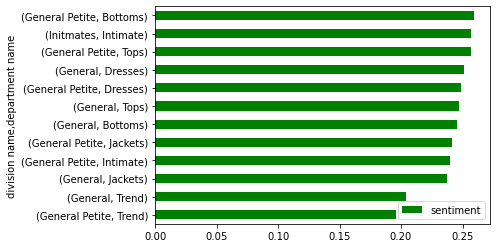

In [61]:
df_avg_rev_pol.sort_values(by='sentiment',ascending=True).set_index(['division name', 'department name']).plot.barh(color='green')